In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("book3.csv",encoding="latin-1",index_col=0)

In [3]:
data

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [3]:
data.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [5]:
data.shape

(10000, 3)

In [6]:
list(data.columns)

['User.ID', 'Book.Title', 'Book.Rating']

In [7]:
#Properly arranging the name of feature
data1=data.rename(columns={"User.ID":"X","Book.Title":"Y","Book.Rating":"Book_Rating"})

In [8]:
data1.head()

,X,Y,Book_Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


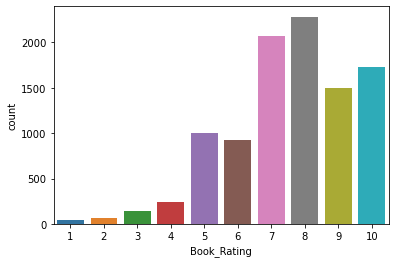

In [10]:
sns.countplot(data1.Book_Rating)
plt.show()

In [11]:
data1.shape

(10000, 3)

In [12]:
data1.isnull().sum()

X              0
Y              0
Book_Rating    0
dtype: int64

In [13]:
data1.describe()

,X,Book_Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [17]:
#Getting the details of 5 most rated books
most_rated_books=pd.DataFrame([4755,2409,2194,4696,1616],index=np.arange(5),columns=['X'])
detail=pd.merge(most_rated_books,data1,on='X')
detail
most_rated_books=pd.DataFrame(data1,columns=['X','Book_Rating'])
most_rated_books.max()

X              278854
Book_Rating        10
dtype: int64

In [18]:
most_rated_books.head()

,X,Book_Rating
1,276726,5
2,276729,3
3,276729,6
4,276736,8
5,276737,6


In [20]:
#Calculating mean
rating=pd.DataFrame(data1.groupby('X')['Book_Rating'].mean())
rating.head()

,Book_Rating
X,
8,5.571429
9,6.000000
10,6.000000
12,10.000000
14,5.333333


In [21]:
#Getting the description of rating
rating.describe()

,Book_Rating
count,2182.000000
mean,7.440003
std,1.655948
min,1.000000
25%,6.500000
50%,7.666667
75%,8.500000
max,10.000000


In [23]:
#Soring based on no. of ratings that each book got
rating.sort_values('Book_Rating',ascending=False).head()

,Book_Rating
X,
3934,10.0
3166,10.0
3174,10.0
277159,10.0
3194,10.0


In [24]:
#Preparing data table for analysis
Book_pivot=pd.pivot_table(index='X',values='Book_Rating',columns='Y',data=data1)
Book_pivot.head()

Y,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
X,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
Book_pivot=Book_pivot.fillna(0)
Book_pivot

Y,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
X,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [26]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [27]:
#Calculating Cosine Similarity between Users
Book_user_sim=1-pairwise_distances(Book_pivot.values,metric='cosine')
Book_user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
#Filling diagonal values with 0
np.fill_diagonal(Book_user_sim,0)

In [31]:
#Storing results in a dataframe
Book_user=pd.DataFrame(Book_user_sim)
Book_user.index-data1.X.unique()
Book_user.columns=data1.X.unique()

In [33]:
Book_user.iloc[0:5,0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
Book_user.head()

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Getting maximum similarities in every rows of users
Book_user.idxmax(axis=1)[0:40]

0     276726
1     276726
2     276726
3     276726
4     276726
5     276726
6     276726
7     161677
8     276726
9     276726
10    276726
11    276726
12    276726
13    276726
14      1491
15    278543
16    276726
17    276726
18    276726
19    276726
20    276726
21    276726
22    276726
23    276726
24    276726
25    277533
26      3546
27    277828
28      3462
29    276726
30    276726
31    276726
32    276726
33    276726
34    276726
35    276726
36    276726
37    276726
38    276726
39    276726
dtype: int64

In [37]:
data1[(data1['X']==278202) | (data1['X']==276737)]

,X,Y,Book_Rating
5,276737,The Mummies of Urumchi,6
1707,278202,The Florabama Ladies' Auxiliary &amp; Sewing C...,3
1708,278202,Howl and Other Poems (Pocket Poets),2
1709,278202,"Frankenstein: Complete, Authoritative Text Wit...",4
1710,278202,Short Stories of Ernest Hemingway (A Scribner ...,5
1711,278202,Back When We Were Grownups : A Novel (Ballanti...,3
1712,278202,To Kill a Mockingbird,9
1713,278202,Birds Bees And Babies 1994,3
1714,278202,The Cat Who Played Brahms,10
1715,278202,Black Notice,3


In [38]:
#Defining function to get similar books read by two users
def get_similar_books(user1,user2):
    # Inner join between movies watched between two users will give
    # The common movies watched.
    common_books=data1[data1.X==user1].merge(data1[data1.X==user2],on='Y',how='inner')
    return common_books.merge(data1,on='Y')

In [39]:
#Getting similar books for 2 users:
get_similar_books(278202,276798)

,X_x,Y,Book_Rating_x,X_y,Book_Rating_y,X,Book_Rating
0,278202,To Kill a Mockingbird,9,276798,7,276798,7
1,278202,To Kill a Mockingbird,9,276798,7,278202,9
